In [35]:
import time
import warnings
from itertools import cycle, islice

import matplotlib.pyplot as plt
import numpy as np

from sklearn import cluster, datasets, mixture
from sklearn.datasets import make_moons, make_circles
from sklearn.cluster import DBSCAN
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

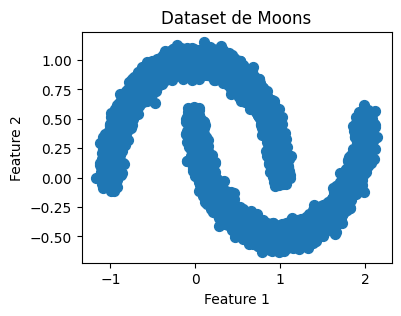

In [36]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.05, random_state=42)

plt.figure(figsize=(4, 3))
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title('Dataset de Moons')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

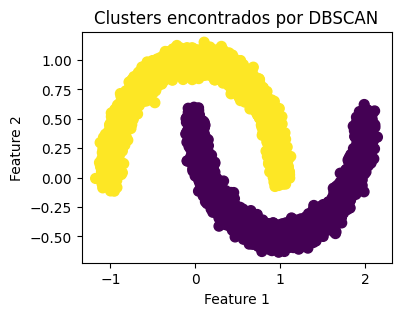

In [37]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=5)
clusters = dbscan.fit_predict(X)

plt.figure(figsize=(4, 3))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('Clusters encontrados por DBSCAN')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [38]:
from sklearn.metrics import silhouette_score

silhouette_score(X, clusters)

np.float64(0.33665202341838835)

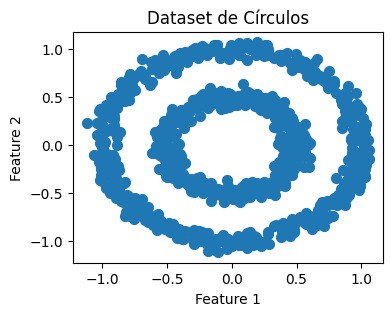

In [39]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, factor=0.5, noise=0.05, random_state=42)

plt.figure(figsize=(4, 3))
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title('Dataset de Círculos')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

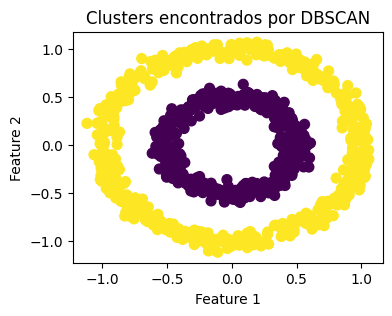

In [40]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.1, min_samples=5)
clusters = dbscan.fit_predict(X)

plt.figure(figsize=(4, 3))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('Clusters encontrados por DBSCAN')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

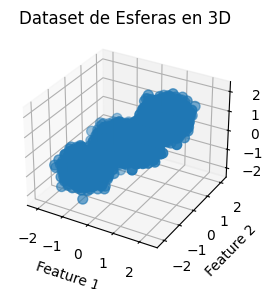

In [41]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

centers = [[1, 1, 1], [-1, -1, -1], [1, -1, 1], [-1, 1, -1]]
X, labels_true = make_blobs(n_samples=10000, centers=centers,
                            cluster_std=0.3, random_state=42)

fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], s=50)
ax.set_title('Dataset de Esferas en 3D')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.show()

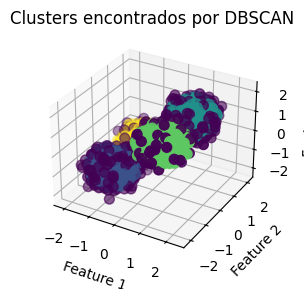

In [42]:
dbscan = DBSCAN(eps=0.2, min_samples=10)
clusters = dbscan.fit_predict(X)

fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2],
                     c=clusters, cmap='viridis', s=50)
ax.set_title('Clusters encontrados por DBSCAN')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.show()

In [43]:
np.unique(clusters)

array([-1,  0,  1,  2,  3])

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import (
    silhouette_score, adjusted_rand_score, homogeneity_score,
    completeness_score, confusion_matrix, classification_report,
    accuracy_score, precision_score, recall_score, f1_score
)

In [45]:
financial_df = pd.read_csv("/content/drive/MyDrive/GraduateCourseAI/UnsupervisedLearning/banksim_adj.csv")
financial_df.drop(["Unnamed: 0"], axis=1, inplace=True)
financial_df.head()

,age,amount,fraud,M,es_barsandrestaurants,es_contents,es_fashion,es_food,es_health,es_home,es_hotelservices,es_hyper,es_leisure,es_otherservices,es_sportsandtoys,es_tech,es_transportation,es_travel
0,3,49.71,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,4,39.29,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,18.76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,4,13.95,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2,49.87,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [46]:
financial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7189 entries, 0 to 7188
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    7189 non-null   int64  
 1   amount                 7189 non-null   float64
 2   fraud                  7189 non-null   int64  
 3   M                      7189 non-null   int64  
 4   es_barsandrestaurants  7189 non-null   int64  
 5   es_contents            7189 non-null   int64  
 6   es_fashion             7189 non-null   int64  
 7   es_food                7189 non-null   int64  
 8   es_health              7189 non-null   int64  
 9   es_home                7189 non-null   int64  
 10  es_hotelservices       7189 non-null   int64  
 11  es_hyper               7189 non-null   int64  
 12  es_leisure             7189 non-null   int64  
 13  es_otherservices       7189 non-null   int64  
 14  es_sportsandtoys       7189 non-null   int64  
 15  es_t

In [47]:
financial_df[financial_df["fraud"] == 1]

,age,amount,fraud,M,es_barsandrestaurants,es_contents,es_fashion,es_food,es_health,es_home,es_hotelservices,es_hyper,es_leisure,es_otherservices,es_sportsandtoys,es_tech,es_transportation,es_travel
6989,4,157.3700,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6990,3,236.1474,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6991,2,236.1474,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6992,1,70.7500,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6993,1,65.1900,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7184,5,236.1474,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7185,5,139.6000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7186,1,236.1474,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7187,1,236.1474,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [48]:
financial_df.describe()

,age,amount,fraud,M,es_barsandrestaurants,es_contents,es_fashion,es_food,es_health,es_home,es_hotelservices,es_hyper,es_leisure,es_otherservices,es_sportsandtoys,es_tech,es_transportation,es_travel
count,7189.000000,7189.000000,7189.000000,7189.000000,7189.000000,7189.000000,7189.000000,7189.000000,7189.000000,7189.000000,7189.000000,7189.000000,7189.000000,7189.000000,7189.000000,7189.000000,7189.000000,7189.000000
mean,2.989706,36.978320,0.027820,0.446794,0.012380,0.001808,0.013493,0.040757,0.033802,0.003338,0.004173,0.011128,0.001808,0.001391,0.010572,0.005425,0.829879,0.002504
std,1.335344,40.524268,0.164469,0.497196,0.110582,0.042489,0.115380,0.197740,0.180731,0.057687,0.064469,0.104909,0.042489,0.037273,0.102281,0.073459,0.375765,0.049979
min,0.000000,1.099800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,14.440000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,3.000000,28.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,4.000000,44.240000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,6.000000,236.147400,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
financial_df_sel = financial_df.drop(columns=["fraud"])
#financial_df_sel = financial_df_sel[["age", "amount", "M", "es_transportation"]]
y = financial_df["fraud"]
financial_df_sel.head()
sd = MinMaxScaler()
X = sd.fit_transform(financial_df_sel)
X, X.shape

(array([[0.5       , 0.20681002, 0.        , ..., 0.        , 1.        ,
         0.        ],
        [0.66666667, 0.16247858, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.5       , 0.07513457, 0.        , ..., 0.        , 1.        ,
         0.        ],
        ...,
        [0.16666667, 1.        , 0.        , ..., 0.        , 0.        ,
         1.        ],
        [0.16666667, 1.        , 1.        , ..., 0.        , 0.        ,
         0.        ],
        [0.66666667, 1.        , 0.        , ..., 0.        , 0.        ,
         0.        ]]),
 (7189, 17))

In [50]:
db = DBSCAN(eps=0.9, min_samples=4, n_jobs=-1).fit(X)
pred_labels = db.labels_

n_clusters = len(set(pred_labels)) - (1 if -1 in y else 0)

print("Estimated number of clusters: {}".format(n_clusters))
print("Homogeneity: {:0.4f}".format(homogeneity_score(y, pred_labels)))
print("Silhouette Coefficient: {:0.4f}".format(silhouette_score(X, pred_labels)))

Estimated number of clusters: 30
Homogeneity: 0.6414
Silhouette Coefficient: 0.7191


In [51]:
np.unique(clusters)

array([-1,  0,  1,  2,  3])

In [52]:
financial_df

,age,amount,fraud,M,es_barsandrestaurants,es_contents,es_fashion,es_food,es_health,es_home,es_hotelservices,es_hyper,es_leisure,es_otherservices,es_sportsandtoys,es_tech,es_transportation,es_travel
0,3,49.7100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,4,39.2900,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,18.7600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,4,13.9500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2,49.8700,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7184,5,236.1474,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7185,5,139.6000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7186,1,236.1474,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7187,1,236.1474,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [53]:
financial_df["cluster"] = clusters[0:len(financial_df)]

In [54]:
financial_df["cluster"].value_counts()

,count
cluster,
2,1748
3,1741
0,1732
1,1722
-1,246


In [55]:
financial_df[financial_df["cluster"] == -1]

,age,amount,fraud,M,es_barsandrestaurants,es_contents,es_fashion,es_food,es_health,es_home,es_hotelservices,es_hyper,es_leisure,es_otherservices,es_sportsandtoys,es_tech,es_transportation,es_travel,cluster
40,5,68.3800,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-1
48,3,65.7600,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,-1
63,3,32.4100,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-1
79,2,28.5400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-1
146,2,1.0998,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7049,3,105.2500,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,-1
7065,3,143.1200,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-1
7131,1,236.1474,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,-1
7132,2,236.1474,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-1


In [56]:
financial_df["isFraudPredicted"] = financial_df["cluster"].isin([-1])

In [57]:
financial_df["isFraudPredicted"].value_counts()

,count
isFraudPredicted,
False,6943
True,246


In [58]:
financial_df["fraud"].value_counts()

,count
fraud,
0,6989
1,200


In [59]:
(
    accuracy_score(financial_df["fraud"], financial_df["isFraudPredicted"]),
    precision_score(financial_df["fraud"], financial_df["isFraudPredicted"]),
    recall_score(financial_df["fraud"], financial_df["isFraudPredicted"]),
    f1_score(financial_df["fraud"], financial_df["isFraudPredicted"])
)

(0.9401863958825984, 0.032520325203252036, 0.04, 0.03587443946188341)

In [60]:
financial_df.head()

,age,amount,fraud,M,es_barsandrestaurants,es_contents,es_fashion,es_food,es_health,es_home,es_hotelservices,es_hyper,es_leisure,es_otherservices,es_sportsandtoys,es_tech,es_transportation,es_travel,cluster,isFraudPredicted
0,3,49.71,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,False
1,4,39.29,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,False
2,3,18.76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,False
3,4,13.95,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,False
4,2,49.87,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,False


In [61]:
financial_df.groupby("fraud").mean()

,age,amount,M,es_barsandrestaurants,es_contents,es_fashion,es_food,es_health,es_home,es_hotelservices,es_hyper,es_leisure,es_otherservices,es_sportsandtoys,es_tech,es_transportation,es_travel,cluster,isFraudPredicted
fraud,,,,,,,,,,,,,,,,,,,
0,2.99027,32.652796,0.449993,0.012448,0.00186,0.013593,0.041923,0.026327,0.002719,0.00186,0.010016,0.000,0.000572,0.00372,0.004579,0.853627,0.000143,1.416512,0.034054
1,2.97000,188.133751,0.335000,0.010000,0.00000,0.010000,0.000000,0.295000,0.025000,0.08500,0.050000,0.065,0.030000,0.25000,0.035000,0.000000,0.085000,1.475000,0.040000


In [62]:
financial_df.groupby("isFraudPredicted").mean()

,age,amount,fraud,M,es_barsandrestaurants,es_contents,es_fashion,es_food,es_health,es_home,es_hotelservices,es_hyper,es_leisure,es_otherservices,es_sportsandtoys,es_tech,es_transportation,es_travel,cluster
isFraudPredicted,,,,,,,,,,,,,,,,,,,
False,2.982140,36.991399,0.027654,0.446061,0.012387,0.001872,0.013539,0.041193,0.033559,0.003457,0.004033,0.011090,0.001728,0.00144,0.010946,0.005473,0.829036,0.002449,1.503817
True,3.203252,36.609167,0.032520,0.467480,0.012195,0.000000,0.012195,0.028455,0.040650,0.000000,0.008130,0.012195,0.004065,0.00000,0.000000,0.004065,0.853659,0.004065,-1.000000


In [63]:
financial_df[(financial_df["isFraudPredicted"] == True) & (financial_df["fraud"] == 1)]

,age,amount,fraud,M,es_barsandrestaurants,es_contents,es_fashion,es_food,es_health,es_home,es_hotelservices,es_hyper,es_leisure,es_otherservices,es_sportsandtoys,es_tech,es_transportation,es_travel,cluster,isFraudPredicted
6990,3,236.1474,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-1,True
7040,6,42.6400,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,True
7046,2,53.4900,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-1,True
7049,3,105.2500,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,-1,True
7065,3,143.1200,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-1,True
7131,1,236.1474,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,-1,True
7132,2,236.1474,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-1,True
7158,5,236.1474,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-1,True


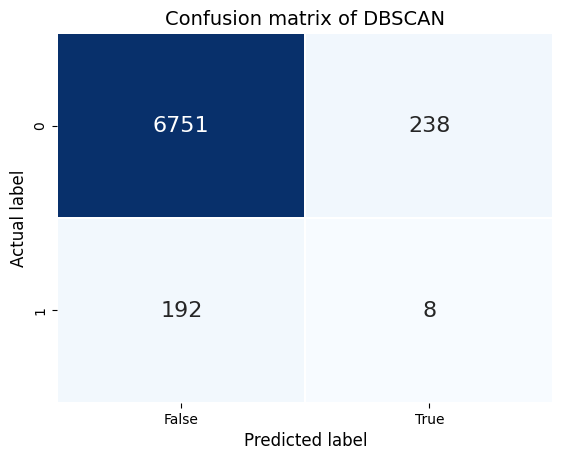

In [64]:
testabc = pd.crosstab(y, financial_df["isFraudPredicted"], rownames=['Actual Fraud'], colnames=['Flagged Fraud'])
sns.heatmap(testabc, annot=True, annot_kws={"size":16}, fmt="d", cbar=False, linewidths=0.1, cmap="Blues")
plt.title("Confusion matrix of DBSCAN", fontsize=14)
plt.ylabel("Actual label", fontsize=12)
plt.xlabel("Predicted label", fontsize=12)
plt.show()